# __Decision Tree Classifier__

In [1]:
import pandas as pd

df = pd.read_csv('iris.csv', index_col='Id')
df.head()

X = df.iloc[:, :-1]
y = df.Species

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Here we are using DecisionTreeClassifier as we need classification
# for Prediction we can use DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [2]:
from sklearn.metrics import accuracy_score, classification_report

y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

print("test accuracy: ",accuracy_score(y_test, y_predict))
print("train accuracy: ",accuracy_score(y_train, y_predict_train))

test accuracy:  0.9666666666666667
train accuracy:  1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



<AxesSubplot:xlabel='col_0', ylabel='Species'>

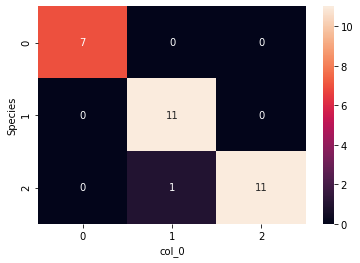

In [3]:
pd.crosstab(y_test, y_predict)

print(classification_report(y_test, y_predict))

import seaborn as sns

sns.heatmap(pd.crosstab(y_test, y_predict), annot=True)

In [4]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


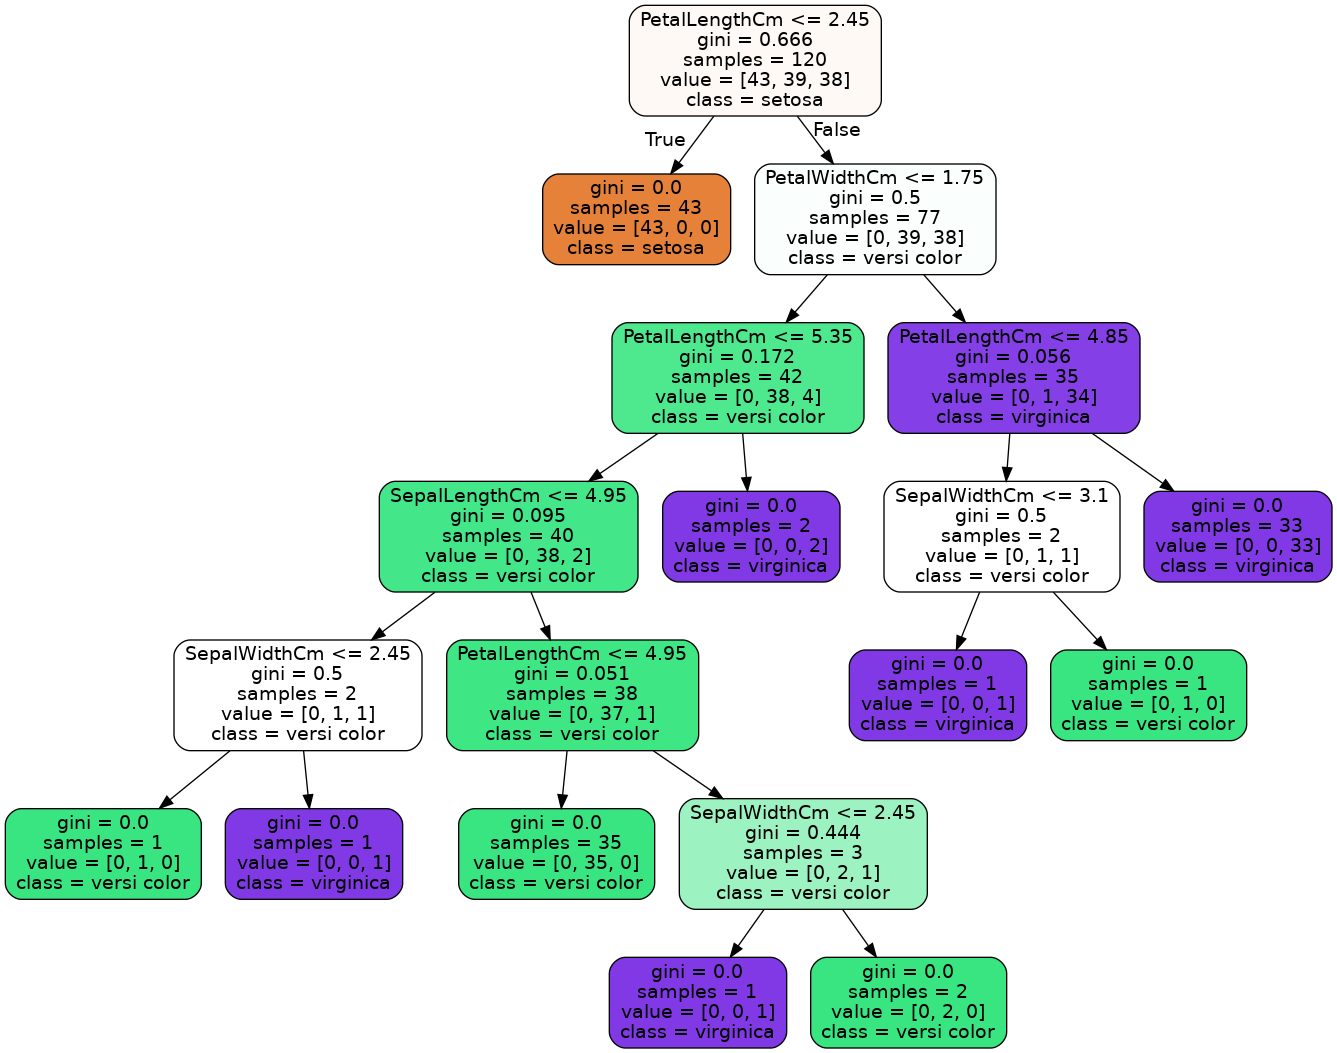

In [5]:
# we are gonna use a library called pydotplus to plot our decision tree
# see colab for the image as this requires setting path variables etc for windows
# for ubuntu one can just perform conda install graphviz along with pip install pydotplus and pip install graphviz
# see the solution link below for further instructions
# https://stackoverflow.com/questions/28312534/graphvizs-executables-are-not-found-python-3-4

from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()

export_graphviz(model, 
                out_file=dot_data,
                filled=True,
                feature_names=X.columns,
                class_names=['setosa','versi color','virginica'],
                rounded=True
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

#### Here since we split the data into training and testing set the model is custom made for training data
#### Overfitting can thus be a peculiar issue 

Decision tree are prone to overfitting
so if we let the decision tree run to the purest leaf branch then it can really overfit the data

TO generalize a decision tree i.e. to stop it from overfitting we restrict it from keeping on creating nodes

lets say we set the __max_depth = 3__ then the decision tree won't create nodes more than 3 nodes for any branch thereby generalizing the decision tree and less prone to overfitting. we may get lesser accuracy on our training data prediction but then our test data will not suffer due to overfitting

So it can handle more data and hence it can be used for more and more test data

Then again we don't won't the model to be too generalized so we need to balance that

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# our model is not overfit but lets say it was then we follow the following

model = DecisionTreeClassifier(max_depth=2)

model.fit(X_train, y_train)

y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

print("test accuracy: ",accuracy_score(y_test, y_predict))
print("train accuracy: ",accuracy_score(y_train, y_predict_train))

test accuracy:  0.9666666666666667
train accuracy:  0.9583333333333334


Now if you check the train and test accuracy for when max_depth is set and not set we can see the difference

the accuracy without setting depth is very high implicating that the model may have overfit the data

whereas when we use a depth of 2 it gives us better results thereby allowing us to use this model for data outside of the training dataset

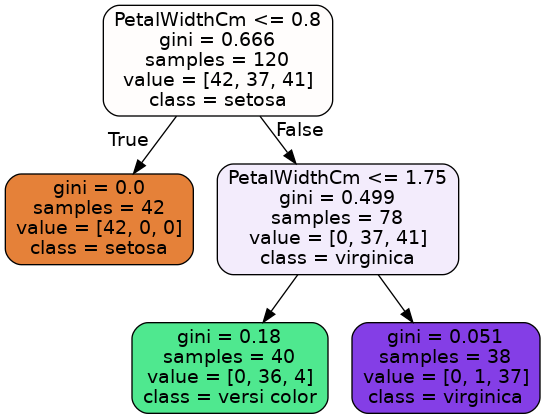

In [7]:
dot_data = StringIO()

export_graphviz(model, 
                out_file=dot_data,
                filled=True,
                feature_names=X.columns,
                class_names=['setosa','versi color','virginica'],
                rounded=True
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# optimization using limiting the max features

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# our model is not overfit but lets say it was then we follow the following

model = DecisionTreeClassifier(max_depth=2, max_features=3)

model.fit(X_train, y_train)

y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

print("test accuracy: ",accuracy_score(y_test, y_predict))
print("train accuracy: ",accuracy_score(y_train, y_predict_train))

test accuracy:  0.9666666666666667
train accuracy:  0.9583333333333334


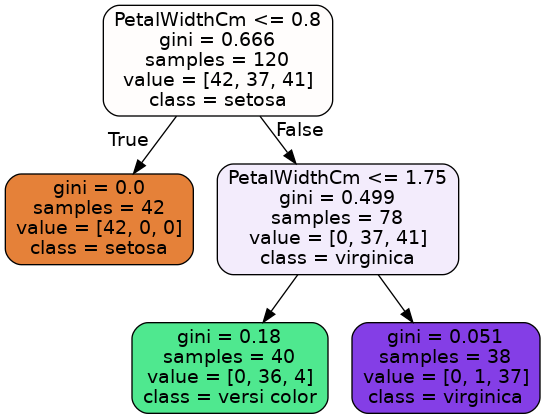

In [10]:
dot_data = StringIO()

export_graphviz(model, 
                out_file=dot_data,
                filled=True,
                feature_names=X.columns,
                class_names=['setosa','versi color','virginica'],
                rounded=True
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())